In [7]:
import os
import pandas

# on se crée une liste d'adresses disques contenant les vidéos
listeAdresse = ['./data/x264-1908-caire-wasm/x264-results1.csv',
 './data/x264-0408-deadline-wasm/x264-results1.csv',
 './data/x264-0308-news-wasm/x264-results1.csv',
 './data/x264-2108-forester-wasm/x264-results1.csv',
 './data/x264-0308-crowd_run-wasm/x264-results1.csv',
 './data/x264-1908-flower-wasm/x264-results1.csv',
 './data/x264-0308-mobilesif-wasm/x264-results1.csv',
 './data/x264-1908-footballcif-wasm/x264-results1.csv',
 './data/x264-2108-netflix-wasm/x264-results1.csv',
 './data/x264-1908-husky-wasm/x264-results1.csv',
 './data/x264-0608-people-wasm/x264-results1.csv',
 './data/x264-1908-bridgefar-wasm/x264-results1.csv',
 './data/x264-0308-sintel-wasm/x264-results1.csv',
 './data/x264-2108-bridgeclose-wasm/x264-results1.csv',
 './data/x264-0408-tos3k-wasm/x264-results1.csv',
 './data/x264-0208-crowd_run-bermuda-wasm/x264-results1.csv',
 './data/x264-0608-coastmp4-wasm-merged/x264-results1.csv',
 './data/x264-2108-ghotism-wasm/x264-results1.csv',
 './data/x264-0508-soccer-wasm/x264-results1.csv',
 './data/x264-0208-sintel-calda-wasm/x264-results1.csv',
 './data/x264-1908-ice-wasm/x264-results1.csv',
 './data/x264-0408-football-wasm/x264-results1.csv',
 './data/x264-1908-tennis-wasm/x264-results1.csv',
 './data/x264-1908-mobilepro-wasm/x264-results1.csv',
 './data/x264-1908-akiyo-wasm/x264-results1.csv',
 './data/x264-0608-park-wasm/x264-results1.csv',
 './data/x264-0608-blue-wasm/x264-results1.csv',
 './data/x264-1908-riverbed-wasm/x264-results1.csv',
 './data/x264-0608-tractor-wasm/x264-results1.csv',
 './data/x264-1908-football15-wasm/x264-results1.csv',
 './data/x264-1908-sunflowers-wasm/x264-results1.csv',
 './data/x264-0308-ducks-wasm/x264-results1.csv',
 './data/x264-1908-waterfall-wasm/x264-results1.csv',
 './data/x264-1908-students-wasm/x264-results1.csv']

#on crée ensuite la liste des données sur chacune des vidéos
listeVideo = []

for adresse in listeAdresse:
    listeVideo.append(pandas.read_csv(open(adresse,"r")))

# on teste l'affichage des données de la première vidéo
listeVideo[0][0:5]
    

,configurationID,H264,no_8x8dct,no_asm,no_cabac,no_deblock,no_fast_pskip,no_mbtree,no_mixed_refs,no_weightb,rc_lookahead,ref,size,usertime,systemtime,elapsedtime
0,1,True,True,False,False,True,True,False,True,True,20,9,78801,1.336,0.068,0.695
1,10,True,True,False,True,False,True,False,False,True,40,9,86351,1.588,0.064,0.603
2,100,True,True,False,False,True,False,True,True,False,40,1,90758,0.928,0.036,0.284
3,1000,True,True,False,True,False,True,True,True,False,40,9,98511,1.348,0.020,0.415
4,1001,True,False,False,False,True,False,False,True,False,60,5,85191,1.072,0.044,0.362


In [21]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import pandas
from matplotlib import pyplot as plt
import sobol_seq
import math
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline

source =  listeVideo[12]

r2_reg = []
for aux in listeVideo:
    x1 = np.asarray(source[['elapsedtime','H264','no_8x8dct','no_asm',
                           'no_cabac','no_deblock','no_fast_pskip',
                           'no_mbtree','no_mixed_refs','no_weightb',
                           'rc_lookahead','ref','usertime','systemtime','elapsedtime']])
    x2 = np.asarray(aux[['elapsedtime','H264','no_8x8dct','no_asm',
                           'no_cabac','no_deblock','no_fast_pskip',
                           'no_mbtree','no_mixed_refs','no_weightb',
                           'rc_lookahead','ref','usertime','systemtime']])
    
    y = np.ravel(aux['elapsedtime'])
    r2=[]
    for i in range(1,15):
        pct_test=1-16*i/len(y)
        X_train_c, X_test_c, X_train, X_test, y_train_aux, y_test_aux = train_test_split(x1, x2, y, test_size=pct_test, random_state=42)
        
        polynomial_features = PolynomialFeatures(degree=3)
        linear_regression = LinearRegression()
        regr = Pipeline([("polynomial_features", polynomial_features),
                         ("linear_regression", linear_regression)])
        regr.fit(X_train_c, y_train_aux)
        prediction_ytrain_aux = regr.predict(X_train_c)
        
        regr.fit(X_train, prediction_ytrain_aux)
        prediction_y_aux = regr.predict(X_test)
        
        r2.append(r2_score(y_test_aux, prediction_y_aux))

    r2_reg.append(r2)
    

r2_learning_test = []
for aux in listeVideo:
    x1 = np.asarray(source[['elapsedtime','H264','no_8x8dct','no_asm',
                           'no_cabac','no_deblock','no_fast_pskip',
                           'no_mbtree','no_mixed_refs','no_weightb',
                           'rc_lookahead','ref','usertime','systemtime','elapsedtime']])
    x2 = np.asarray(aux[['elapsedtime','H264','no_8x8dct','no_asm',
                           'no_cabac','no_deblock','no_fast_pskip',
                           'no_mbtree','no_mixed_refs','no_weightb',
                           'rc_lookahead','ref','usertime','systemtime']])
    
    y = np.ravel(aux['elapsedtime'])

    r2 = []
    for i in range(1,15):
        pct_test = 1-16*i/len(y)
        X_train_c, X_test_c, X_train, X_test, y_train_aux, y_test_aux = train_test_split(x1, x2, y, test_size=pct_test, random_state=42)
        
        # Transfert function : prediction of y train of the aimed video with x train of the sourced video
        clf = RandomForestRegressor()
        clf.fit(X_train_c, y_train_aux)
        prediction_ytrain_aux = clf.predict(X_train_c)
        
        # Machine learning to explain y train from x train -> prediction of y_test from x_test
        clf2 = RandomForestRegressor()
        clf2.fit(X_train, prediction_ytrain_aux)
        prediction_y_aux = clf2.predict(X_test)
        
        r2.append(r2_score(y_test_aux, prediction_y_aux))

    r2_learning_test.append(r2)

    
    
data_test=pandas.DataFrame(data=r2_learning_test)
data_sobol = pandas.DataFrame(data=r2_reg)


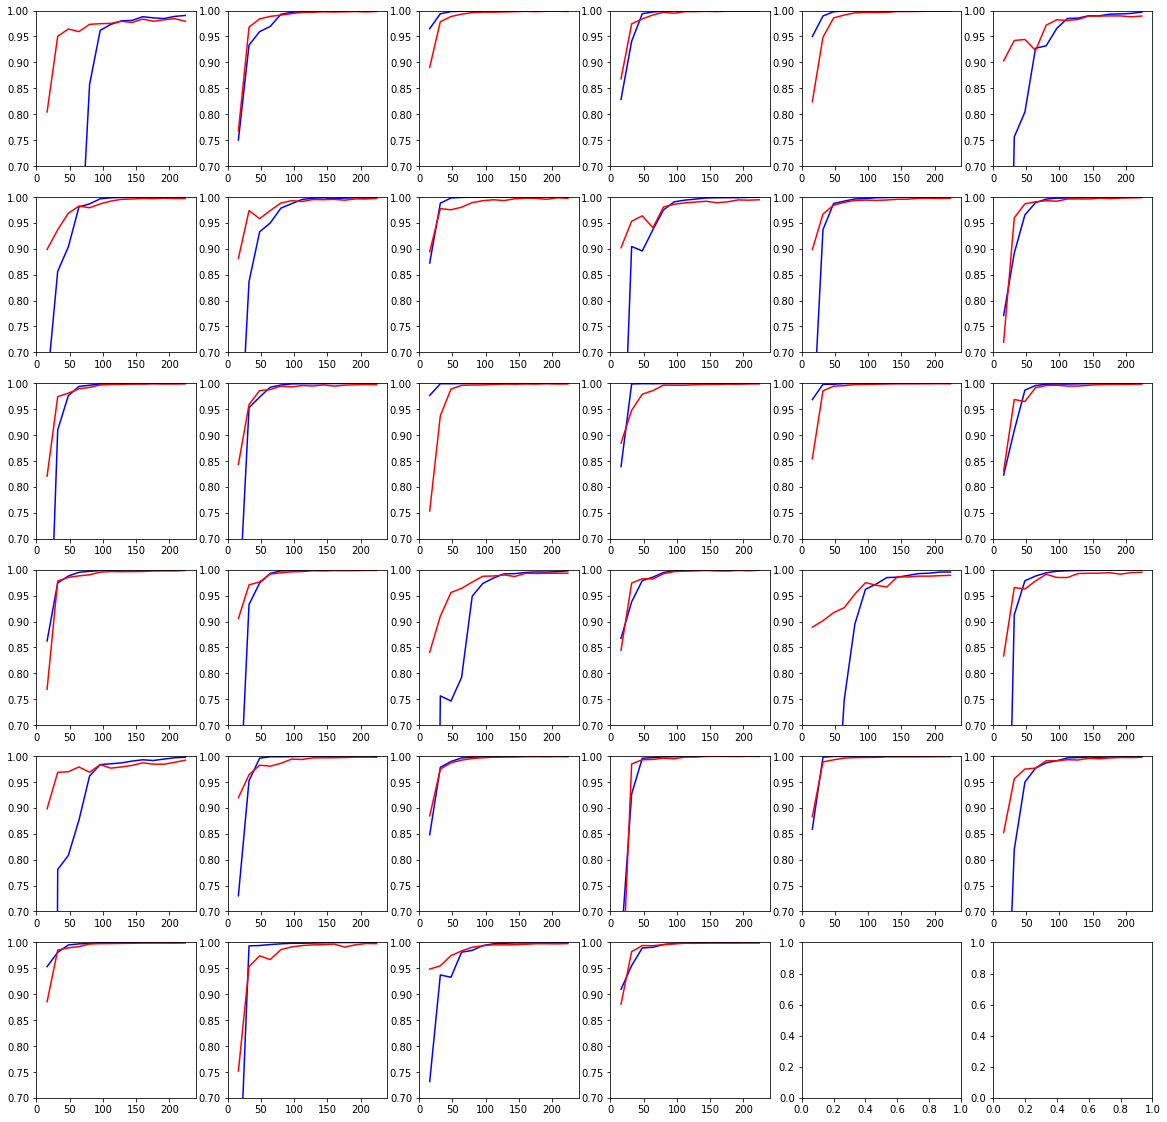

In [22]:
import numpy as np
from matplotlib import pyplot as plt

taille = 6
plt.subplots(nrows=taille,ncols=taille,figsize=(20, 20))

for i in range(taille):
    for j in range(taille):
        plt.subplot(taille,taille,taille*i+j+1)
        x1=np.asarray(data_sobol[taille*i+j:taille*i+j+1])
        x2=np.asarray(data_test[taille*i+j:taille*i+j+1])
        if taille*i+j<34:
            plt.axis([0,15*16,0.7,1])
            plt.plot(range(16,15*16,16),x1[0],c="blue")
            plt.plot(range(16,15*16,16),x2[0],c="red")
plt.show()

In [23]:
print("Stat r² pour 32 config (T+L polynomial)")
print(data_sobol[8].describe())
print("")
print("Stat r² pour 32 config (T+L random forest)")
print(data_test[8].describe())
print("")
print("somme des erreurs")
print(sum((data_test[8]-data_sobol[8])))

Stat r² pour 32 config (T+L polynomial)
count    34.000000
mean      0.997775
std       0.004485
min       0.981041
25%       0.999020
50%       0.999511
75%       0.999825
max       0.999952
Name: 8, dtype: float64

Stat r² pour 32 config (T+L random forest)
count    34.000000
mean      0.995154
std       0.005132
min       0.977034
25%       0.995612
50%       0.996572
75%       0.998299
max       0.999292
Name: 8, dtype: float64

somme des erreurs
-0.0891167905085
